In [1]:
import sklearn.svm as svm
from os import listdir
import os
from os.path import isfile, join
from bs4 import BeautifulSoup as bs
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import cv2
import numpy as np
from sklearn import model_selection, preprocessing

img_dimension = 100

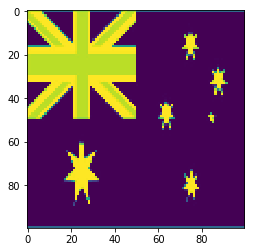

250
[[ 0  0  0 ... 17 17 17]
 [ 0  0  0 ... 17 17 17]
 [ 0  0  0 ... 17 17 17]
 ...
 [ 0  0  0 ... 17 17 17]
 [ 0  0  0 ... 17 17 17]
 [ 0  0  0 ... 17 17 17]]
(100, 100)
10000


In [2]:
mypath = "/Users/rohitneppalli/Downloads/Flags"
my_dir = sorted(listdir(mypath))
onlyfiles = [join(mypath,f) for f in my_dir if isfile(join(mypath, f)) and ".png" in str(f)]
onlyfiles.sort(key=lambda x: os.path.getmtime(join(mypath, x)))
images = [np.array(cv2.resize(mpimg.imread(join(mypath, file), 0), (img_dimension, img_dimension)))[
    :, :, 0] for file in onlyfiles]  # screws up image color, but down to 2 dimensions
plt.imshow(images[100])
plt.show()
print(len(images))
print(images[0])
print(np.array(images[0]).shape)
print(np.array(images[0]).size)

In [3]:
html = bs(urllib.request.urlopen("https://www.cia.gov/library/publications/the-world-factbook/docs/flagsoftheworld.html"), "lxml")

div_names = sorted([div.getText() for div in html.find_all("div", attrs={"class": "flag-description"})])
print(div_names)

['Afghanistan', 'Akrotiri', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Ashmore and Cartier Islands', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Clipperton Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo, Democratic Republic of the', 'Congo, Republic of the', 'Cook Islands', 'Coral Sea Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Dhekelia', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ec

          Country   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5   Pixel 6  \
0     Afghanistan -1.801486 -1.745098 -1.731087 -1.751298 -1.739147 -1.706871   
1        Akrotiri  0.806424  0.978066  0.947274  0.948352  0.953176  0.975642   
2         Albania -0.799373 -0.762391 -0.760327 -0.777076 -0.767570 -0.738834   
3         Algeria -1.040846 -0.999188 -0.994245 -1.011828 -1.001685 -0.972096   
4  American Samoa  0.806424  0.800468  0.783532  0.772287  0.777590  0.800695   

    Pixel 7   Pixel 8   Pixel 9     ...       Pixel 9991  Pixel 9992  \
0 -1.686793 -1.573472 -1.593489     ...        -1.563441   -1.563876   
1  0.998142  1.092251  1.081868     ...         1.000011    0.999342   
2 -0.717881 -0.611494 -0.628034     ...        -0.769132   -0.769639   
3 -0.951354 -0.843295 -0.860674     ...         0.855591    0.854936   
4  0.823038  0.918399  0.907388     ...         0.687101    0.686461   

   Pixel 9993  Pixel 9994  Pixel 9995  Pixel 9996  Pixel 9997  Pixel 9998  \
0  

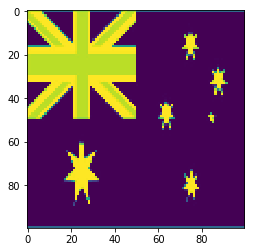

In [4]:
df = pd.DataFrame({"Country": div_names})

for i in range(img_dimension**2):
    pixels = [images[x][int(i/img_dimension)][i%img_dimension] for x in range(len(images))]
    pixels = preprocessing.scale(pixels)
    df["Pixel " + str(i + 1)] = pixels
print(df.head())
plt.imshow(images[100])
plt.show()

In [5]:
model = svm.SVC(gamma=0.001, C=1000)
x = df[df.columns.values[1:]]
y = df.Country
model.fit(x, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
img = "/Users/rohitneppalli/Downloads/si.png"
img_array = np.array(cv2.resize(mpimg.imread(img, 0), (img_dimension, img_dimension)))[:, :, 0]
pixels = [img_array[int(i/img_dimension)][i % img_dimension] for i in range(img_dimension**2)]
pixels = np.array(preprocessing.scale(pixels))

print(model.predict(pixels.reshape(-1, img_dimension**2)))

['Solomon Islands']
